<a href="https://colab.research.google.com/github/nurdankar/KerasAPI/blob/master/KerasAPI_%C3%87okluGirdiliModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KERAS API İLE ÇOKLU GİRDİLİ MODEL(MULTIPLE INPUT MODEL WİTH KERAS API)

## Gerekli Kütüphanelerin Import Edilmesi

In [1]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

## Giriş Katmanı

In [2]:
visible1 = Input(shape=(64,64,1))
visible2 = Input(shape=(32,32,3))
visible3 = Input(shape=(16,16,1))

# Öznitelik Çıkarma İşlemleri İçin Evrişim Katmanları

In [3]:
# Birinci Giriş Katmanı
conv11 = Conv2D(64, kernel_size=8, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(32, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)

# İkinci Giriş Katmanı
conv21 = Conv2D(32, kernel_size=4, activation='relu')(visible2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)

# Üçüncü Giriş Katmanı
conv31 = Conv2D(32, kernel_size=4, activation='relu')(visible3)
pool31 = MaxPooling2D(pool_size=(2, 2))(conv31)
conv32 = Conv2D(16, kernel_size=4, activation='relu')(pool31)
pool32 = MaxPooling2D(pool_size=(2, 2))(conv32)
flat3 = Flatten()(pool32)

# Birleştirme Katmanı
merge = concatenate([flat1, flat2, flat3])
hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)


# Çıkış Katmanı
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=[visible1, visible2, visible3], outputs=output)

# Modelin Özeti

In [4]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 16, 16, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 57, 57, 64)   4160        input_1[0][0]                    
_______________________________________________________________________________________

# Modelin Görselleştirilmesi

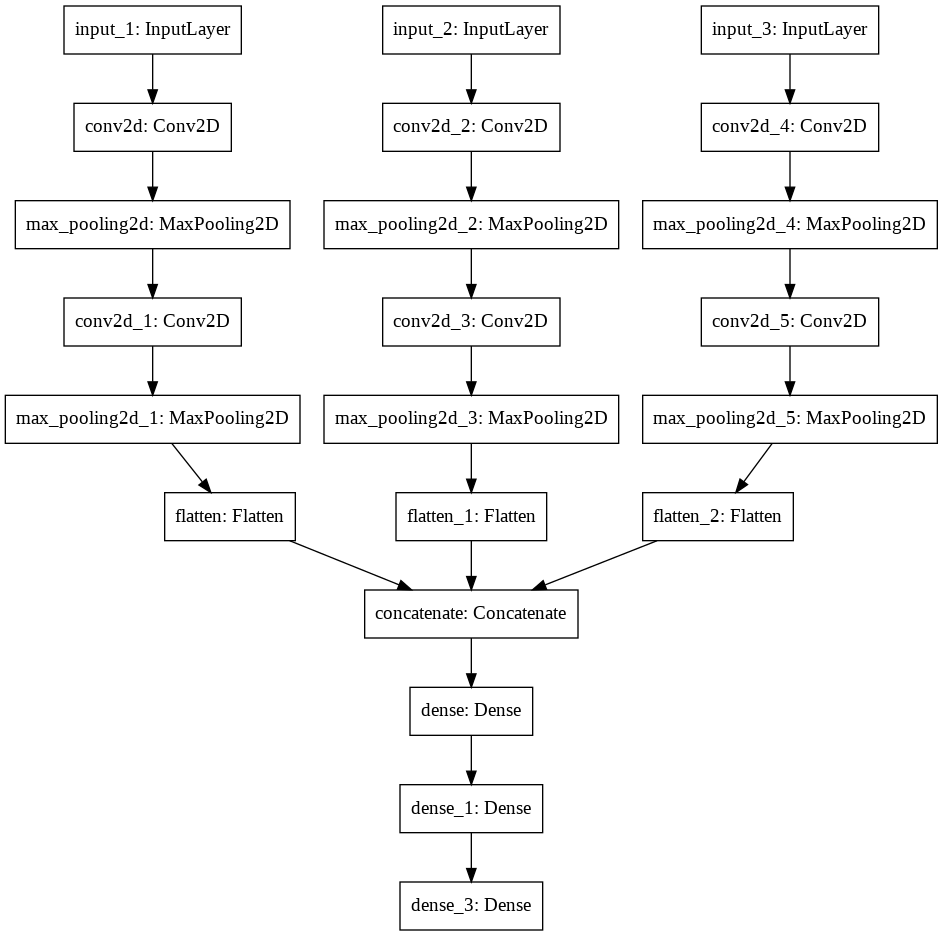

In [5]:
plot_model(model, to_file='multiple_inputs.png')